**元データを処理してシミュレーションに渡すデータを作る & 自動車のプロファイルを作る & デマンドレスポンスの割合を作る**


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import glob
import os

os.makedirs('data', exist_ok=True)

# Demand

In [24]:
df_demand = pd.read_csv('raw_data/archive_demand/electricity.csv')
# print(df_demand.head())
df_demand

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,...,96.925,704.950,111.350,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17540,2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,...,97.550,695.700,115.875,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17541,2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,...,93.825,687.325,111.650,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000
17542,2017-12-31 22:00:00,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,...,94.150,674.275,111.950,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000


**西海岸からのデータはbearとswanが相当**

データ見た感じbearだけの方が良さそう

swanは西海岸だけど詳細な場所不明，bearはUCバークレーっぽい

In [25]:
# df_demand_ca = df_demand.loc[:, df_demand.columns.str.contains('timestamp|Bear|Swan')]
df_demand_ca = df_demand.loc[:, df_demand.columns.str.contains('timestamp|Bear')]
# 2016年度のデータを抽出
df_demand_ca = df_demand_ca[df_demand_ca['timestamp'].str.contains('2016')].reset_index(drop=True)
df_demand_ca.to_csv('data/demand.csv', index=False)
df_demand_ca

,timestamp,Bear_public_Orville,Bear_education_Lidia,Bear_education_Nanette,Bear_education_Lewis,Bear_science_Alison,Bear_education_Darrell,Bear_education_Thuy,Bear_lodging_Erick,Bear_education_Mara,...,Bear_assembly_Diana,Bear_education_Irene,Bear_education_Wade,Bear_education_Babara,Bear_education_Liliana,Bear_lodging_Esperanza,Bear_education_Alfredo,Bear_education_Yvette,Bear_education_Lashanda,Bear_public_Rayna
0,2016-01-01 00:00:00,9.6108,7.75,NaN,15.25,77.20,21.0625,146.0996,66.9298,439.750,...,NaN,77.00,44.6,310.6750,445.7513,NaN,0.1025,7.25,23.125,48.200
1,2016-01-01 01:00:00,9.8000,8.25,NaN,15.25,75.00,20.4882,146.1086,68.5849,438.150,...,NaN,75.00,43.8,304.9500,442.9983,NaN,0.0950,8.50,22.775,47.250
2,2016-01-01 02:00:00,9.8000,8.25,NaN,15.50,75.75,20.3655,146.8850,71.7227,433.125,...,NaN,75.50,44.2,304.8250,441.2521,NaN,0.1025,7.25,23.600,48.600
3,2016-01-01 03:00:00,9.9000,7.00,NaN,15.50,76.75,20.2887,150.5104,70.9663,427.525,...,NaN,75.00,46.8,311.6750,442.9989,NaN,0.1025,7.50,23.575,47.725
4,2016-01-01 04:00:00,9.7000,7.75,NaN,15.00,77.00,19.9610,153.6493,75.0570,427.200,...,NaN,75.25,47.0,306.5000,441.7518,NaN,0.1175,8.00,23.625,48.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,11.6000,7.50,97.3315,16.00,105.25,19.0048,148.0152,69.5664,447.725,...,0.700,71.00,40.6,347.2957,381.2500,19.296,0.0900,4.50,64.100,47.675
8780,2016-12-31 20:00:00,10.7000,7.25,95.7155,15.75,105.00,19.0278,147.5246,71.5738,447.575,...,0.883,71.00,41.0,344.6339,384.0000,20.078,0.0975,5.00,63.850,49.150
8781,2016-12-31 21:00:00,10.7000,7.50,102.6420,15.50,102.75,19.0830,148.2566,69.3755,446.075,...,0.646,71.00,41.0,345.4498,NaN,19.654,0.1000,3.50,55.500,49.675
8782,2016-12-31 22:00:00,10.7000,7.75,93.3773,14.25,101.00,18.8690,149.0220,70.6005,445.600,...,0.662,71.00,41.4,347.1217,378.5000,19.664,0.0875,4.50,30.100,47.840


**消費量のメタデータを読み込んで建物の面積で正規化**

Wh/m^2にする

In [26]:
df_demand_metadata = pd.read_csv('raw_data/archive_demand/metadata.csv')
# print(df_demand_metadata.head())
df_demand_metadata

,building_id,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
0,Panther_lodging_Dean,Panther,NaN,0.0,Lodging/residential,Residence Hall,508.8,5477.0,28.517689,-81.379039,...,1989.0,NaN,NaN,NaN,NaN,271,NaN,NaN,NaN,NaN
1,Panther_lodging_Shelia,Panther,NaN,0.0,Lodging/residential,Residence Hall,929.0,10000.0,28.517689,-81.379039,...,1992.0,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN
2,Panther_lodging_Ricky,Panther,NaN,0.0,Lodging/residential,Residence Hall,483.1,5200.0,28.517689,-81.379039,...,2016.0,NaN,NaN,NaN,NaN,534,NaN,NaN,NaN,NaN
3,Panther_education_Rosalie,Panther,0.0,0.0,Education,Research,690.5,7432.0,28.517689,-81.379039,...,2008.0,NaN,NaN,NaN,NaN,276,NaN,NaN,NaN,NaN
4,Panther_education_Misty,Panther,1.0,0.0,Education,Research,252.7,2720.0,28.517689,-81.379039,...,2004.0,NaN,NaN,NaN,NaN,375,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,Mouse_health_Estela,Mouse,NaN,NaN,Healthcare,Hospital,17193.0,185064.0,51.521939,-0.120069,...,1936.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,F
1632,Mouse_health_Ileana,Mouse,NaN,NaN,Healthcare,Hospital,5399.0,58114.0,51.521939,-0.120069,...,1954.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,F
1633,Mouse_health_Buddy,Mouse,NaN,NaN,Healthcare,Hospital,1749.0,18826.0,51.521939,-0.120069,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,F
1634,Mouse_lodging_Vicente,Mouse,NaN,NaN,Lodging/residential,Hotel,3489.0,37555.0,51.521939,-0.120069,...,2006.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,F


In [27]:
df_demand_metadata_ca = df_demand_metadata[df_demand_metadata['building_id'].str.contains('Bear')]
df_demand_metadata_ca.set_index('building_id', inplace=True)
df_demand_metadata_ca

,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,lng,timezone,...,yearbuilt,date_opened,numberoffloors,occupants,energystarscore,eui,site_eui,source_eui,leed_level,rating
building_id,,,,,,,,,,,,,,,,,,,,,
Bear_education_Yvette,Bear,565.0,4.0,Education,Education,1423.8,15326.0,37.871903,-122.260729,US/Pacific,...,1954.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_education_Arnold,Bear,566.0,4.0,Education,Education,186.7,2010.0,37.871903,-122.260729,US/Pacific,...,1957.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_assembly_Danial,Bear,567.0,4.0,Entertainment/public assembly,Entertainment/public assembly,7680.3,82670.0,37.871903,-122.260729,US/Pacific,...,2016.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_education_Carlo,Bear,568.0,4.0,Education,Education,1314.6,14150.0,37.871903,-122.260729,US/Pacific,...,1974.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_education_Maryjane,Bear,569.0,4.0,Education,Education,7998.1,86091.0,37.871903,-122.260729,US/Pacific,...,1964.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bear_parking_Bruce,Bear,651.0,4.0,Parking,Parking,28441.3,306140.0,37.871903,-122.260729,US/Pacific,...,2007.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_education_Augusta,Bear,652.0,4.0,Education,Education,14017.9,150887.0,37.871903,-122.260729,US/Pacific,...,1959.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bear_education_Chad,Bear,653.0,4.0,Education,Education,39101.5,420885.0,37.871903,-122.260729,US/Pacific,...,1930.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for nm in df_demand_metadata_ca.index:
    df_demand_ca.loc[:, nm] = df_demand_ca.loc[:, nm] * 1000 / df_demand_metadata_ca.at[nm, 'sqm']
df_demand_ca.to_csv('data/demand.csv', index=False)
df_demand_ca

,timestamp,Bear_public_Orville,Bear_education_Lidia,Bear_education_Nanette,Bear_education_Lewis,Bear_science_Alison,Bear_education_Darrell,Bear_education_Thuy,Bear_lodging_Erick,Bear_education_Mara,...,Bear_assembly_Diana,Bear_education_Irene,Bear_education_Wade,Bear_education_Babara,Bear_education_Liliana,Bear_lodging_Esperanza,Bear_education_Alfredo,Bear_education_Yvette,Bear_education_Lashanda,Bear_public_Rayna
0,2016-01-01 00:00:00,3.559556,2.744043,NaN,3.323671,15.609835,4.023861,5.815558,10.006698,36.943537,...,NaN,31.882738,4.226366,35.509367,23.285342,NaN,0.168088,5.092007,2.112779,3.115768
1,2016-01-01 01:00:00,3.629630,2.921078,NaN,3.323671,15.164995,3.914145,5.815916,10.254153,36.809120,...,NaN,31.054615,4.150557,34.855014,23.141530,NaN,0.155789,5.969940,2.080802,3.054358
2,2016-01-01 02:00:00,3.629630,2.921078,NaN,3.378157,15.316645,3.890704,5.846821,10.723286,36.386968,...,NaN,31.261645,4.188462,34.840726,23.050311,NaN,0.168088,5.092007,2.156177,3.141625
3,2016-01-01 03:00:00,3.666667,2.478490,NaN,3.378157,15.518845,3.876032,5.991131,10.610197,35.916511,...,NaN,31.054615,4.434842,35.623664,23.141561,NaN,0.168088,5.267594,2.153893,3.085063
4,2016-01-01 04:00:00,3.592593,2.744043,NaN,3.269185,15.569395,3.813427,6.116077,11.221799,35.889207,...,NaN,31.158130,4.453794,35.032175,23.076414,NaN,0.192686,5.618767,2.158461,3.144857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,4.296296,2.655525,15.824974,3.487130,21.281543,3.630750,5.891809,10.400897,37.613519,...,5.775578,29.398369,3.847320,39.695020,19.915896,2.388474,0.147589,3.160556,5.856395,3.081831
8780,2016-12-31 20:00:00,3.962963,2.567008,15.562231,3.432644,21.230993,3.635144,5.872280,10.701024,37.600917,...,7.285479,29.398369,3.885225,39.390783,20.059552,2.485270,0.159888,3.511729,5.833554,3.177179
8781,2016-12-31 21:00:00,3.962963,2.655525,16.688399,3.378157,20.776043,3.645690,5.901418,10.372356,37.474902,...,5.330033,29.398369,3.885225,39.484038,NaN,2.432787,0.163988,2.458210,5.070670,3.211116
8782,2016-12-31 22:00:00,3.962963,2.744043,15.182066,3.105725,20.422193,3.604807,5.931885,10.555506,37.434997,...,5.462046,29.398369,3.923129,39.675132,19.772241,2.434025,0.143490,3.160556,2.750039,3.092497


**欠損値の割合が10％以上の列を削除**

残りは線形補間

In [29]:
# 各列の欠損値の割合を計算
missing_percentage = df_demand_ca.isna().mean()
# 欠損値の割合が10%未満の列を抽出
df_demand_ca = df_demand_ca.loc[:, missing_percentage < 0.1]
# データを線形補完
df_demand_ca = df_demand_ca.interpolate(forecast='linear', limit_direction='both')
df_demand_ca.to_csv('data/demand.csv', index=False)
df_demand_ca

C:\Users\ys11m\AppData\Local\Temp\ipykernel_23992\2881634561.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_demand_ca = df_demand_ca.interpolate(forecast='linear', limit_direction='both')


,timestamp,Bear_public_Orville,Bear_education_Lidia,Bear_education_Lewis,Bear_science_Alison,Bear_education_Darrell,Bear_education_Thuy,Bear_lodging_Erick,Bear_education_Mara,Bear_education_Bulah,...,Bear_education_Benita,Bear_assembly_Beatrice,Bear_education_Millie,Bear_education_Irene,Bear_education_Wade,Bear_education_Babara,Bear_education_Alfredo,Bear_education_Yvette,Bear_education_Lashanda,Bear_public_Rayna
0,2016-01-01 00:00:00,3.559556,2.744043,3.323671,15.609835,4.023861,5.815558,10.006698,36.943537,50.654506,...,37.807430,3.211991,5.179840,31.882738,4.226366,35.509367,0.168088,5.092007,2.112779,3.115768
1,2016-01-01 01:00:00,3.629630,2.921078,3.323671,15.164995,3.914145,5.815916,10.254153,36.809120,50.686695,...,37.852247,3.658101,5.142058,31.054615,4.150557,34.855014,0.155789,5.969940,2.080802,3.054358
2,2016-01-01 02:00:00,3.629630,2.921078,3.378157,15.316645,3.890704,5.846821,10.723286,36.386968,50.611588,...,37.907200,3.568879,5.327188,31.261645,4.188462,34.840726,0.168088,5.092007,2.156177,3.141625
3,2016-01-01 03:00:00,3.666667,2.478490,3.378157,15.518845,3.876032,5.991131,10.610197,35.916511,50.761803,...,37.928543,3.211991,5.247846,31.054615,4.434842,35.623664,0.168088,5.267594,2.153893,3.085063
4,2016-01-01 04:00:00,3.592593,2.744043,3.269185,15.569395,3.813427,6.116077,11.221799,35.889207,50.643777,...,37.888162,3.568879,5.183618,31.158130,4.453794,35.032175,0.192686,5.618767,2.158461,3.144857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,4.296296,2.655525,3.487130,21.281543,3.630750,5.891809,10.400897,37.613519,59.345494,...,34.227222,16.059957,5.225178,29.398369,3.847320,39.695020,0.147589,3.160556,5.856395,3.081831
8780,2016-12-31 20:00:00,3.962963,2.567008,3.432644,21.230993,3.635144,5.872280,10.701024,37.600917,57.017167,...,33.994856,16.416845,5.202509,29.398369,3.885225,39.390783,0.159888,3.511729,5.833554,3.177179
8781,2016-12-31 21:00:00,3.962963,2.655525,3.378157,20.776043,3.645690,5.901418,10.372356,37.474902,56.920601,...,33.893907,16.238401,5.119389,29.398369,3.885225,39.484038,0.163988,2.458210,5.070670,3.211116
8782,2016-12-31 22:00:00,3.962963,2.744043,3.105725,20.422193,3.604807,5.931885,10.555506,37.434997,56.706009,...,33.903684,8.386867,5.062717,29.398369,3.923129,39.675132,0.143490,3.160556,2.750039,3.092497


各列ごとの平均値(エージェントごとの平均電力消費量[Wh/m^2*h])をヒストグラムで表示

0.0-5.0      14
5.0-10.0     26
10.0-15.0    10
15.0-20.0     8
20.0-25.0     6
25.0-30.0     1
30.0-35.0     0
35.0-40.0     4
40.0-45.0     5
45.0-50.0     0
50.0-55.0     1
55.0-60.0     1
60.0-65.0     1
65.0-70.0     1
70.0-75.0     0
75.0-80.0     1
Name: count, dtype: int64


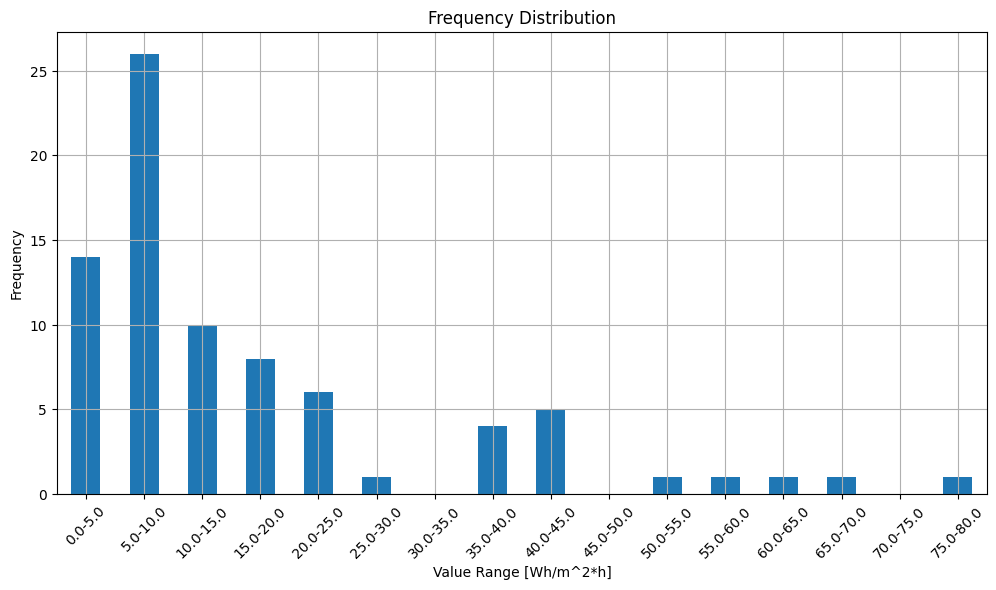

In [30]:
df_demand_ca_no_timestamp = df_demand_ca.drop('timestamp', axis=1)
averages = df_demand_ca_no_timestamp.mean()
data = averages
# 値を等間隔にグループ分け
# bins = np.linspace(data.min(), data.max(), 11)
# labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]
# data_binned = pd.cut(data, bins=bins, labels=labels, include_lowest=True)

# 最小値と最大値を取得
min_val = data.min()
max_val = data.max()

# 5刻みでグループ分けするためのビンの境界を作成
bins = np.arange(min_val - (min_val % 5), max_val + 5 - (max_val % 5) + 5, 5)
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# グループ分け
data_binned = pd.cut(data, bins=bins, labels=labels, include_lowest=True, right=False)

# 出現頻度分布の計算
frequency_distribution = data_binned.value_counts().sort_index()

# 結果の表示
print(frequency_distribution)

# プロット
frequency_distribution.plot(kind='bar', figsize=(12, 6), rot=45, title='Frequency Distribution')
plt.xlabel('Value Range [Wh/m^2*h]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

平均値が30以上のデータと1以下のデータは落とす

0.0-5.0      11
5.0-10.0     26
10.0-15.0    10
15.0-20.0     8
20.0-25.0     6
25.0-30.0     1
30.0-35.0     0
35.0-40.0     4
40.0-45.0     5
45.0-50.0     0
50.0-55.0     1
55.0-60.0     1
60.0-65.0     1
65.0-70.0     1
70.0-75.0     0
75.0-80.0     1
Name: count, dtype: int64


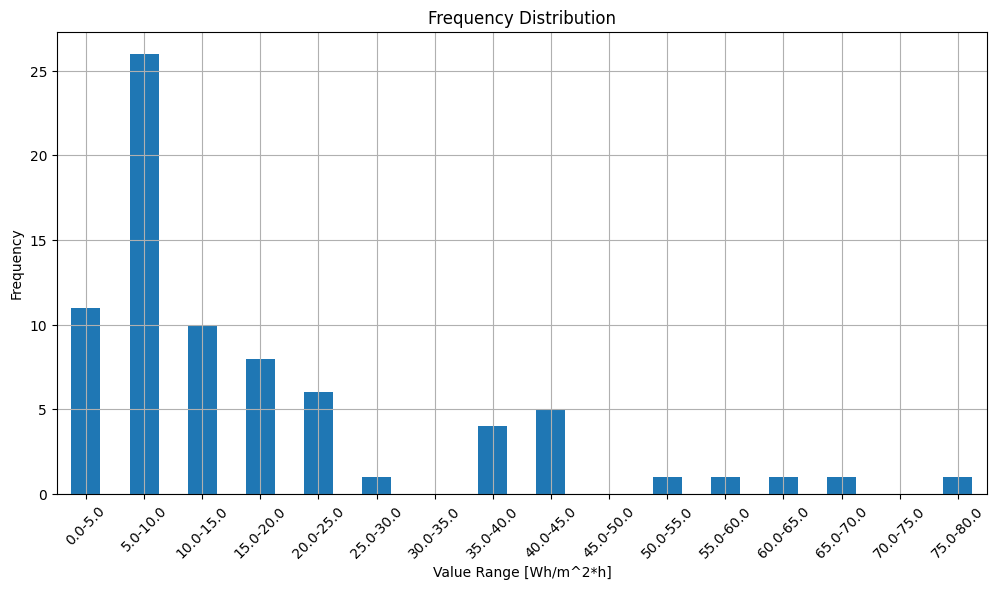

,Bear_public_Orville,Bear_education_Lidia,Bear_education_Lewis,Bear_science_Alison,Bear_education_Darrell,Bear_education_Thuy,Bear_lodging_Erick,Bear_education_Mara,Bear_education_Bulah,Bear_lodging_Evan,...,Bear_public_Valorie,Bear_education_Benita,Bear_assembly_Beatrice,Bear_education_Millie,Bear_education_Irene,Bear_education_Wade,Bear_education_Babara,Bear_education_Yvette,Bear_education_Lashanda,Bear_public_Rayna
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,3.559556,2.744043,3.323671,15.609835,4.023861,5.815558,10.006698,36.943537,50.654506,6.247966,...,4.204976,37.807430,3.211991,5.179840,31.882738,4.226366,35.509367,5.092007,2.112779,3.115768
2016-01-01 01:00:00,3.629630,2.921078,3.323671,15.164995,3.914145,5.815916,10.254153,36.809120,50.686695,6.262496,...,4.133946,37.852247,3.658101,5.142058,31.054615,4.150557,34.855014,5.969940,2.080802,3.054358
2016-01-01 02:00:00,3.629630,2.921078,3.378157,15.316645,3.890704,5.846821,10.723286,36.386968,50.611588,6.277026,...,4.190770,37.907200,3.568879,5.327188,31.261645,4.188462,34.840726,5.092007,2.156177,3.141625
2016-01-01 03:00:00,3.666667,2.478490,3.378157,15.518845,3.876032,5.991131,10.610197,35.916511,50.761803,6.189845,...,4.148152,37.928543,3.211991,5.247846,31.054615,4.434842,35.623664,5.267594,2.153893,3.085063
2016-01-01 04:00:00,3.592593,2.744043,3.269185,15.569395,3.813427,6.116077,11.221799,35.889207,50.643777,6.160785,...,4.190770,37.888162,3.568879,5.183618,31.158130,4.453794,35.032175,5.618767,2.158461,3.144857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,4.296296,2.655525,3.487130,21.281543,3.630750,5.891809,10.400897,37.613519,59.345494,7.206956,...,2.400814,34.227222,16.059957,5.225178,29.398369,3.847320,39.695020,3.160556,5.856395,3.081831
2016-12-31 20:00:00,3.962963,2.567008,3.432644,21.230993,3.635144,5.872280,10.701024,37.600917,57.017167,7.221486,...,2.415020,33.994856,16.416845,5.202509,29.398369,3.885225,39.390783,3.511729,5.833554,3.177179
2016-12-31 21:00:00,3.962963,2.655525,3.378157,20.776043,3.645690,5.901418,10.372356,37.474902,56.920601,6.945413,...,2.386608,33.893907,16.238401,5.119389,29.398369,3.885225,39.484038,2.458210,5.070670,3.211116


In [31]:
data = df_demand_ca.set_index('timestamp', inplace=False)
# 各列ごとの平均値を計算
column_means = data.mean()

# 平均値が30以上の列を取得
columns_to_drop = column_means[column_means >= 30].index
columns_to_drop = column_means[column_means <= 1].index

# これらの列をドロップ
data_dropped = data.drop(columns=columns_to_drop)

data_dropped_average = data_dropped.mean()

# 最小値と最大値を取得
min_val = data_dropped_average.min()
max_val = data_dropped_average.max()

# 5刻みでグループ分けするためのビンの境界を作成
bins = np.arange(min_val - (min_val % 5), max_val + 5 - (max_val % 5) + 5, 5)
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

# グループ分け
data_binned = pd.cut(data_dropped_average, bins=bins, labels=labels, include_lowest=True, right=False)

# 出現頻度分布の計算
frequency_distribution = data_binned.value_counts().sort_index()

# 結果の表示
print(frequency_distribution)

# プロット
frequency_distribution.plot(kind='bar', figsize=(12, 6), rot=45, title='Frequency Distribution')
plt.xlabel('Value Range [Wh/m^2*h]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

data_dropped.to_csv('data/demand.csv', index=True)
data_dropped

# Supply

kWh/kWとしてデータ作る

In [32]:
df_supply = pd.DataFrame(columns=['timestamp'])
key = 'raw_data/archive_supply/*.csv'
files = glob.glob(key)
for file in files:
    df = pd.read_csv(file)
    zipcode = os.path.basename(file).split('.')[0]
    df.columns = ['timestamp', zipcode]
    # 2016年度のデータを抽出
    df = df[df['timestamp'].str.contains('2016')].reset_index(drop=True)
    # データを線形補完
    # df[zipcode] = df[zipcode].interpolate(forecast='linear', limit_direction='both')
    df_supply = pd.merge(df_supply, df, on='timestamp', how='outer')

# print(df_demand.head())
df_supply.to_csv('data/supply.csv', index=False)
df_supply

,timestamp,90210,90230,90240,90245,90254,90266,90274,90275,90278,...,95694,95695,95762,95776,95928,95963,95965,95966,96007,96073
0,01/01/2016 0:00:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,01/01/2016 0:15:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,01/01/2016 0:30:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,01/01/2016 0:45:00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,01/01/2016 10:00:00,0.11585,0.06091,0.08427,0.03735,0.09871,0.10278,0.08808,0.14928,0.06723,...,0.04812,0.10379,0.03009,0.09784,0.04612,0.20296,0.03962,0.04976,0.16396,0.24946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,12/31/2016 8:45:00,0.01733,0.02147,0.00582,0.02564,0.02775,0.02210,0.03736,0.04911,0.02789,...,0.00441,0.01918,0.02011,0.01652,0.07196,0.01976,0.01084,0.01196,0.00103,0.17756
35132,12/31/2016 9:00:00,0.02066,0.02351,0.00705,0.03024,0.03468,0.02092,0.02776,0.04548,0.02309,...,0.01701,0.01591,0.01659,0.01037,0.08550,0.04611,0.01351,0.01387,0.01719,0.19095
35133,12/31/2016 9:15:00,0.02339,0.02523,0.00808,0.03378,0.03850,0.02205,0.03552,0.04797,0.02013,...,0.01841,0.01192,0.02063,0.00971,0.09628,0.09272,0.01895,0.02420,0.04947,0.19790
35134,12/31/2016 9:30:00,0.02550,0.02523,0.00817,0.03723,0.04459,0.03241,0.03324,0.04268,0.02953,...,0.01550,0.00811,0.02708,0.00621,0.10823,0.13519,0.01947,0.03143,0.08605,0.20585


元データは15分間隔になっているので1時間ごとの値にする

In [33]:
# 'timestamp'をDatetime型に変換
df_supply['timestamp'] = pd.to_datetime(df_supply['timestamp'])
# 'timestamp'をインデックスに設定
df_supply.set_index('timestamp', inplace=True)
# 1時間間隔でデータを集約（合計値）
df_supply = df_supply.resample('h').sum()
df_supply.to_csv('data/supply.csv', index=True)
df_supply

,90210,90230,90240,90245,90254,90266,90274,90275,90278,90402,...,95694,95695,95762,95776,95928,95963,95965,95966,96007,96073
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Price

11月3日のデータがない！

11月2日のデータを3日にもあてがうぜ

In [34]:
df_price = pd.read_csv('raw_data/archive_price/2016 CAISO Day-Ahead Price.csv')
# print(df_price.head())
df_price

,Date,Price (cents/kWh),Zone
0,1/1/16 0:00,31.53128,PGAE
1,1/1/16 0:00,32.12050,SCE
2,1/1/16 0:00,32.07273,SDGE
3,1/1/16 0:00,31.54402,VEA
4,1/1/16 1:00,30.27335,PGAE
...,...,...,...
35035,12/31/16 22:00,37.05311,VEA
35036,12/31/16 23:00,36.14225,PGAE
35037,12/31/16 23:00,34.04208,SCE
35038,12/31/16 23:00,36.16417,SDGE


In [35]:
# 'Zone'が'PGAE'の行を抽出
df_price = df_price[df_price['Zone'] == 'PGAE']
df_price

,Date,Price (cents/kWh),Zone
0,1/1/16 0:00,31.53128,PGAE
4,1/1/16 1:00,30.27335,PGAE
8,1/1/16 2:00,30.21553,PGAE
12,1/1/16 3:00,28.39699,PGAE
16,1/1/16 4:00,28.62750,PGAE
...,...,...,...
35020,12/31/16 19:00,47.49282,PGAE
35024,12/31/16 20:00,44.33104,PGAE
35028,12/31/16 21:00,42.40155,PGAE
35032,12/31/16 22:00,39.84720,PGAE


In [36]:
# 'Date'をDatetime型に変換
df_price['Date'] = pd.to_datetime(df_price['Date'])
# カラム名を変更
df_price.columns = ['timestamp', 'Price', 'Zone']
# 'timestamp'をインデックスに設定
df_price.drop('Zone', axis=1, inplace=True)
# df_price.set_index('timestamp', inplace=True)
# データを線形補間
# df_price['Price'] = df_price['Price'].interpolate(forecast='linear', limit_direction='both')
df_price.to_csv('data/price.csv', index=True)
df_price

C:\Users\ys11m\AppData\Local\Temp\ipykernel_23992\2760918773.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_price['Date'] = pd.to_datetime(df_price['Date'])
C:\Users\ys11m\AppData\Local\Temp\ipykernel_23992\2760918773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Date'] = pd.to_datetime(df_price['Date'])
C:\Users\ys11m\AppData\Local\Temp\ipykernel_23992\2760918773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,timestamp,Price
0,2016-01-01 00:00:00,31.53128
4,2016-01-01 01:00:00,30.27335
8,2016-01-01 02:00:00,30.21553
12,2016-01-01 03:00:00,28.39699
16,2016-01-01 04:00:00,28.62750
...,...,...
35020,2016-12-31 19:00:00,47.49282
35024,2016-12-31 20:00:00,44.33104
35028,2016-12-31 21:00:00,42.40155
35032,2016-12-31 22:00:00,39.84720


In [37]:
# 11月2日のデータをフィルタリング
df_1102 = df_price[df_price['timestamp'].dt.date == pd.Timestamp('2016-11-02').date()].copy()

# 11月2日のデータを11月3日に変更
df_1103 = df_1102.copy()
df_1103['timestamp'] = df_1103['timestamp'] + pd.DateOffset(days=1)

# 11月2日までのデータ
df_before = df_price[df_price['timestamp'] < '2016-11-03']

# 11月4日以降のデータ
df_after = df_price[df_price['timestamp'] >= '2016-11-04']

# データを結合
df_combined = pd.concat([df_before, df_1103, df_after], ignore_index=True)

# 結果の表示
print(df_combined)

# 必要に応じて、新しいCSVファイルとして保存
df_combined.to_csv('data/price.csv', index=False)

               timestamp     Price
0    2016-01-01 00:00:00  31.53128
1    2016-01-01 01:00:00  30.27335
2    2016-01-01 02:00:00  30.21553
3    2016-01-01 03:00:00  28.39699
4    2016-01-01 04:00:00  28.62750
...                  ...       ...
8779 2016-12-31 19:00:00  47.49282
8780 2016-12-31 20:00:00  44.33104
8781 2016-12-31 21:00:00  42.40155
8782 2016-12-31 22:00:00  39.84720
8783 2016-12-31 23:00:00  36.14225

[8784 rows x 2 columns]


# Car profile

| Annual Mileage           | Usage Frequency                                |ratio|
|--------------------------|------------------------------------------------|-----|
| below 3000 km/year       | do not ride often                              |12.9 |
| 3000 ~ 5000 km/year      | mostly for nearby shopping                     |25.8 |
| 5000 ~ 7000 km/year      | mostly for commuting to work or school (approx. 30 min/one way) |22.5 |
| 7000 ~ 9000 km/year      | mostly used on weekends, sometimes trips       |14.8 |
| 9000 ~ 11000 km/year     | mostly for commuting to work or school (approx. 60 min/one way) |13.8 |
| 11000 ~ 16000 km/year    | long drive every day                           |6.0  |
| 16000 km or more         | super long drive                               |4.2  |

In [38]:
import pandas as pd
import numpy as np
np.random.seed(42)

# Make these numbers of EV movement data according to the ratio of car usage
ratios = {
    "-3000": 129,
    "3000-5000": 258,
    "5000-7000": 225,
    "7000-9000": 148,
    "9000-11000": 138,
    "11000-16000": 60,
    "16000-": 42
}

# Define annual mileage categories and their corresponding base probabilities of movement
mileage_categories = {
    "-3000": 0.01,
    "3000-5000": 0.02,
    "5000-7000": 0.03,
    "7000-9000": 0.04,
    "9000-11000": 0.05,
    "11000-16000": 0.06,
    "16000-": 0.08
}
# Increase probability during peak hours: 7 AM, 8 AM, 5 PM, 6 PM
peak_hours = [7, 8, 17, 18]
peak_probabilities = {
    "-3000": 0.02,
    "3000-5000": 0.04,
    "5000-7000": 0.06,
    "7000-9000": 0.08,
    "9000-11000": 0.10,
    "11000-16000": 0.12,
    "16000-": 0.16
}  # Higher probability during peak hours

# Lower probability of movement during off-peak hours: 12 AM - 5 AM
off_peak_hours = [0, 1, 2, 3, 4, 5]
off_peak_probabilities = {
    "-3000": 0.005,
    "3000-5000": 0.01,
    "5000-7000": 0.015,
    "7000-9000": 0.02,
    "9000-11000": 0.025,
    "11000-16000": 0.03,
    "16000-": 0.04
}  # Lower probability during off-peak hours

# Generate a time index for the year 2016 with hourly intervals
time_index = pd.date_range(start='2016-01-01 00:00:00', end='2016-12-31 23:00:00', freq='h', name='timestamp')

# Number of hours in the year 2016 (leap year)
num_hours = len(time_index)

# Create a DataFrame with the time index and the movement data
df_movement = pd.DataFrame(index=time_index)

num = 0
for key, value in mileage_categories.items():
    for i in range(ratios[key]):
        # Define base probability of movement for a specific mileage category
        base_probability = mileage_categories[key]

        # Create an array to store movement probabilities for each hour
        probabilities = np.full(num_hours, base_probability)

        # Adjust probabilities for peak hours
        for i in range(num_hours):
            if time_index[i].hour in peak_hours:
                probabilities[i] = peak_probabilities[key]
        
        # Adjust probabilities for off-peak hours
        for i in range(num_hours):
            if time_index[i].hour in off_peak_hours:
                probabilities[i] = off_peak_probabilities[key]

        # Randomly assign TRUE or FALSE values based on the adjusted probabilities
        movement_data = np.random.rand(num_hours) <= probabilities

        # Add the movement data to the DataFrame
        df_movement[num] = movement_data
        num += 1

print(df_movement.sum())
# Save and display the DataFrame
df_movement.to_csv('data/car_movement.csv', index=True)
df_movement


C:\Users\ys11m\AppData\Local\Temp\ipykernel_23992\4280612602.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_movement[num] = movement_data
C:\Users\ys11m\AppData\Local\Temp\ipykernel_23992\4280612602.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_movement[num] = movement_data
C:\Users\ys11m\AppData\Local\Temp\ipykernel_23992\4280612602.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

0       78
1      100
2       86
3       80
4      101
      ... 
995    781
996    702
997    730
998    749
999    723
Length: 1000, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-01 01:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-01 02:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2016-01-01 03:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-01-01 04:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-12-31 20:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2016-12-31 21:00:00,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# Elastic ratioをoff-peak, mid-peak, on-peakでそれぞれ作る

In [39]:
import pandas as pd
import numpy as np

# Define elastic ratio value for each peak level
elastic_ratios = {
    "off-peak": 0.5,
    "mid-peak": 0.3,
    "on-peak": 0.1,
}
# Define peak hours
off_peak_hours = [0,1,2,3,4,5,6,22,23]
mid_peak_hours = [7,8,9,10,11,12,13,14,15,16]
on_peak_hours = [17,18,19,20,21]

# Generate a time index for the year 2016 with hourly intervals
time_index = pd.date_range(start='2016-01-01 00:00:00', end='2016-12-31 23:00:00', freq='h', name='timestamp')

# Create the DataFrame
df = pd.DataFrame(index=time_index)

# Function to determine the elastic ratio based on the hour
def get_elastic_ratio(hour):
    if hour in off_peak_hours:
        return elastic_ratios["off-peak"]
    elif hour in mid_peak_hours:
        return elastic_ratios["mid-peak"]
    elif hour in on_peak_hours:
        return elastic_ratios["on-peak"]

# Apply the function to get the elastic ratio for each timestamp
df['elastic_ratio'] = df.index.hour.map(get_elastic_ratio)
# Save and display the DataFrame
df.to_csv('data/elastic_ratio.csv', index=True)
df

,elastic_ratio
timestamp,
2016-01-01 00:00:00,0.5
2016-01-01 01:00:00,0.5
2016-01-01 02:00:00,0.5
2016-01-01 03:00:00,0.5
2016-01-01 04:00:00,0.5
...,...
2016-12-31 19:00:00,0.1
2016-12-31 20:00:00,0.1
2016-12-31 21:00:00,0.1
